# Titanic Survival Prediction
### By Shakar Lateef Mohammed

In [5]:
import pandas as pd

train_df = pd.read_csv('sample_data/train.csv')
test_df = pd.read_csv('sample_data/test.csv')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data proccessing

In [10]:
import numpy as np

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, errors='ignore')

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.59      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



## DATA Visualization

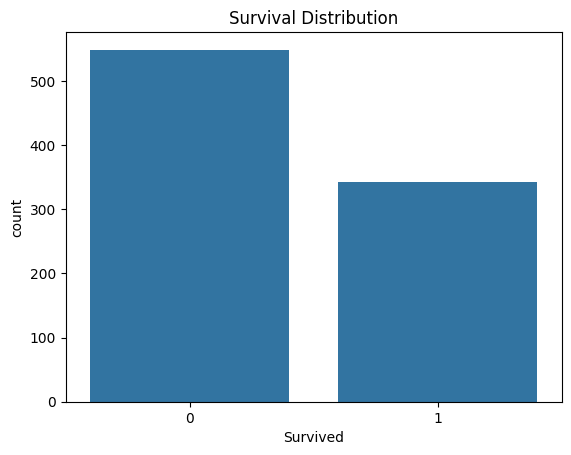

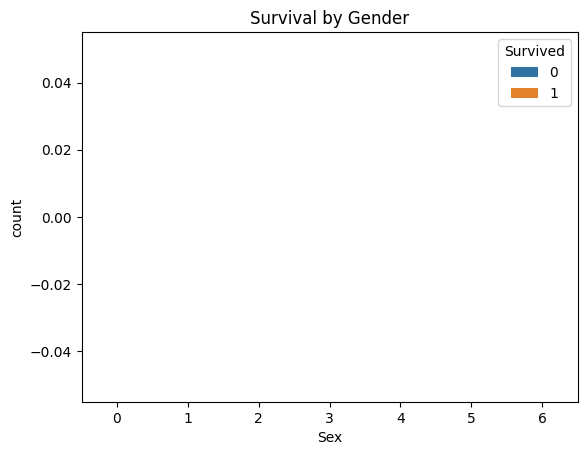

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()

## Summary and Results

### Logistic Regression:
- Accuracy: 81%
- Balanced performance for both classes.
- F1-Score for survivors (class 1): 76%.

### Random Forest:
- Accuracy: 81%
- Slightly better in predicting survivors (class 1) with F1-Score: 77%.

### Support Vector Machine:
- Accuracy: 66%
- Poor performance in predicting survivors (class 1) with F1-Score: 38%.

### Conclusion:
- Logistic Regression and Random Forest performed equally well.
- Random Forest is the best choice for predicting survival.
